In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

In [8]:
train = pd.read_csv('../apartment/train.csv')
#train.info()

In [9]:
train.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          

In [10]:
train['CarPerArea']=train['GarageCars']/train['GarageArea']
train['CarPerArea']=train['CarPerArea'].fillna(0)

In [11]:
train['basementAnd1stFloorArea'] = train['1stFlrSF']+train['TotalBsmtSF']

In [12]:
train = train.drop('GarageArea',1)
train = train.drop('GarageCars',1)
train = train.drop('1stFlrSF',1)
train = train.drop('TotalBsmtSF',1)

In [13]:
from sklearn import preprocessing

catagorical_cols=[]
for column in train.columns.values:
    if (train[column].dtype=='O'):
        catagorical_cols.append(column)


for x in catagorical_cols:
    train[x]=train[x].fillna('None')
    
for x in catagorical_cols:
    label = preprocessing.LabelEncoder()
    train[x] = label.fit_transform(train[x])

In [14]:
from sklearn import preprocessing
from sklearn import linear_model, svm, gaussian_process
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model.stochastic_gradient import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Lasso
import numpy as np

In [15]:
train1 = train.drop('SalePrice',1)
X = train1
y1 =  pd.DataFrame(train['SalePrice'],columns=['SalePrice'])
y = pd.concat([ train['Id'],y1], axis=1)
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [16]:
#X_train

In [17]:
for x in X_train.columns.values:
    if(X_train[x].isnull().sum() >0):
        print(x)

LotFrontage
MasVnrArea
GarageYrBlt


In [18]:
cols =['SalePrice','OverallQual','GrLivArea','CarPerArea','basementAnd1stFloorArea','FullBath','YearBuilt','TotRmsAbvGrd','YearRemodAdd']

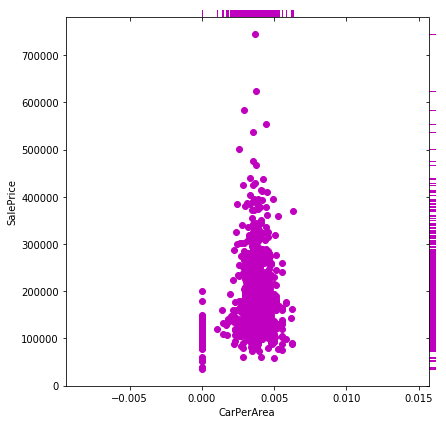

In [19]:
x=X_train['CarPerArea']
y=y_train['SalePrice']
grid = sns.JointGrid(x, y, space=0, size=6, ratio=50)
grid.plot_joint(plt.scatter, color="m")
grid.plot_marginals(sns.rugplot, height=1, color="m")

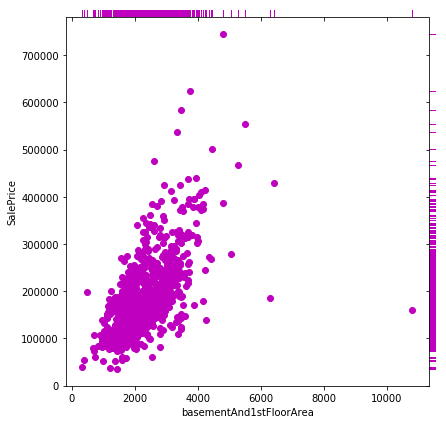

In [13]:
x=X_train['basementAnd1stFloorArea']
y=y_train['SalePrice']
grid = sns.JointGrid(x, y, space=0, size=6, ratio=50)
grid.plot_joint(plt.scatter, color="m")
grid.plot_marginals(sns.rugplot, height=1, color="m")

In [20]:
#GrLivArea outlier
X_train.sort_values(by = 'GrLivArea', ascending = False)[:2]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,CarPerArea,basementAnd1stFloorArea
1298,1299,60,3,313.0,63887,1,1,2,0,0,...,2,4,1,0,1,2008,6,5,0.001410,10802
523,524,60,3,130.0,40094,1,1,0,0,0,...,3,4,1,0,10,2007,6,5,0.003394,6276


In [21]:
X_train = X_train.drop(X_train[X_train['Id'] == 1299].index)
X_train = X_train.drop(X_train[X_train['Id'] == 524].index)

In [22]:
y_train = y_train.drop(y_train[y_train['Id'] == 1299].index)
y_train = y_train.drop(y_train[y_train['Id'] == 524].index)

In [23]:
#CarPerArea
X_train.sort_values(by = 'CarPerArea', ascending = False)[:6]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,CarPerArea,basementAnd1stFloorArea
644,645,20,1,85.0,9187,1,1,3,3,0,...,3,4,1,0,10,2009,6,5,0.006276,3532
735,736,75,4,60.0,10800,1,1,3,3,0,...,3,4,1,0,10,2006,8,4,0.006250,1760
1376,1377,30,3,52.0,6292,1,1,3,0,0,...,3,4,1,0,4,2008,8,4,0.006250,1558
1022,1023,50,4,52.0,9439,1,1,3,3,0,...,3,4,1,0,3,2007,8,4,0.006250,1824
1149,1150,70,4,50.0,9000,1,1,3,3,0,...,3,4,1,0,7,2009,8,4,0.006173,1482
456,457,70,4,34.0,4571,1,0,3,3,0,...,3,4,1,0,5,2008,0,0,0.005848,1248


In [24]:
X_train = X_train.drop(X_train[X_train['Id'] == 269].index)
X_train = X_train.drop(X_train[X_train['Id'] == 947].index)
X_train = X_train.drop(X_train[X_train['Id'] == 902].index)
X_train = X_train.drop(X_train[X_train['Id'] == 901].index)
X_train = X_train.drop(X_train[X_train['Id'] == 1299].index)
X_train = X_train.drop(X_train[X_train['Id'] == 864].index)

In [25]:
y_train = y_train.drop(y_train[y_train['Id'] == 269].index)
y_train = y_train.drop(y_train[y_train['Id'] == 947].index)
y_train = y_train.drop(y_train[y_train['Id'] == 902].index)
y_train = y_train.drop(y_train[y_train['Id'] == 901].index)
y_train = y_train.drop(y_train[y_train['Id'] == 1299].index)
y_train = y_train.drop(y_train[y_train['Id'] == 864].index)

In [26]:
#basementAnd1stFloorArea
X_train.sort_values(by = 'CarPerArea', ascending = False)[:1]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,CarPerArea,basementAnd1stFloorArea
644,645,20,1,85.0,9187,1,1,3,3,0,...,3,4,1,0,10,2009,6,5,0.006276,3532


In [27]:
X_train = X_train.drop(X_train[X_train['Id'] == 269].index)

In [28]:
y_train = y_train.drop(y_train[y_train['Id'] == 269].index)

In [29]:
#X_train

In [30]:
cols =['OverallQual','GrLivArea','CarPerArea','basementAnd1stFloorArea','FullBath','YearBuilt','TotRmsAbvGrd','YearRemodAdd']
X_train = X_train[cols].values.astype(np.float64)
y_train = y_train['SalePrice'].values.astype(np.float64)

In [31]:
minmaxscaler = preprocessing.MinMaxScaler(copy=True, feature_range=(0, 1)).fit(X_train)
X_train = minmaxscaler.fit_transform(X_train)
#y_train = minmaxscaler.fit_transform(y_train.reshape(-1,1))
#X_test = minmaxscaler.transform(X_test)
#y_test = minmaxscaler.transform(y_test.reshape(-1,1))

In [32]:
cols =['OverallQual','GrLivArea','CarPerArea','basementAnd1stFloorArea','FullBath','YearBuilt','TotRmsAbvGrd','YearRemodAdd']
X_test = X_test[cols].values.astype(np.float64)
y_test = y_test['SalePrice'].values.astype(np.float64)
#minmaxscaler = preprocessing.MinMaxScaler(copy=True, feature_range=(0, 1)).fit(X_t)
X_test = minmaxscaler.transform(X_test)
#y_test = minmaxscaler.transform(y_test.reshape(-1,1))

In [34]:
clfs = {
        'svm':svm.SVR(), 
        'RandomForestRegressor':RandomForestRegressor(n_estimators=150),
        'LinearRegression':linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        'DecisionTreeRegressor':DecisionTreeRegressor(),
        'SGDRegressor':SGDRegressor(max_iter=5, tol = None),
        'GradientBoostingRegressor':GradientBoostingRegressor(),
        'MLPRegressor':MLPRegressor(solver='adam', activation = 'logistic',hidden_layer_sizes=20, max_iter=1000, learning_rate='adaptive', random_state= None),
        'Lasso':Lasso(alpha = 0.1,max_iter=1000,random_state=None)
       }
for clf in clfs:
    try:
        clfs[clf].fit(X_train, y_train.ravel())   #why need to make this ravel()??
        y_pred = clfs[clf].predict(X_test)
        #print(clf + " cost:" + str(np.sum(y_pred-y_test)/len(y_pred)))
        #print(clf + " score:" + str(np.mean(np.absolute(y_pred-y_test))))
        #print(clf + " score:" + str(np.mean((y_pred-y_test)*(y_pred-y_test))))
        print(clf + " score:" + str(np.sqrt(np.mean((np.log(y_pred)-np.log(y_test))*(np.log(y_pred)-np.log(y_test))))))
    except Exception as e:
        print(clf + " Error:")
        print(str(e))

svm score:0.41175555925413804
RandomForestRegressor score:0.15627363284936877
LinearRegression score:0.2343424741470695
DecisionTreeRegressor score:0.21263451674221068
SGDRegressor score:0.25204215404599134
GradientBoostingRegressor score:0.16492619327218833
MLPRegressor score:7.144187788966609
Lasso score:0.2343393468344547


D:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [26]:
#For prediction

In [27]:
test = pd.read_csv('../apartment/test.csv')

In [28]:
model = RandomForestRegressor(n_estimators=150)

In [29]:
test['basementAnd1stFloorArea'] =test['1stFlrSF']+test['TotalBsmtSF']

In [30]:
test['CarPerArea']=test['GarageCars']/test['GarageArea']

In [31]:
test['CarPerArea']=test['CarPerArea'].fillna(272.566184)
test['basementAnd1stFloorArea']=test['basementAnd1stFloorArea'].fillna(2202.831276)

In [32]:
XX = train[cols].values
yy = train['SalePrice'].values
X_train1,X_test1, y_train1, y_test1 = train_test_split(XX, yy, test_size=0.30, random_state=42)
model.fit(X_train1,y_train1)
X = test[cols]
y_predict = model.predict(X)

In [33]:
predicted_result = pd.DataFrame(data = y_predict,columns=['SalePrice'])
result = pd.concat([test['Id'],predicted_result],axis=1)

In [34]:
result.to_csv('../apartment/predictFinal.csv',index = False)